In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from time import time
from functions import utils
import os.path as path

## User input

In [4]:
sample_file = utils.gui_fname().decode("utf-8")
# background_filename = utils.gui_fname().decode("utf-8")
tokens = sample_file.split('/')
base = path.basename(sample_file)
abs_dir = path.dirname(sample_file)
prefix = base.split('.')[0]
sample_prefix = abs_dir + '/' + prefix
print("Sample: \n%s" %sample_file)
# print("Background: \n%s" %background_filename)

Sample: 
/Users/ashleefeng/OneDrive - Johns Hopkins/PacBio/181207_Ashlee/30s_43N43/m181207_211324_42131_c000468682559900001500000112312060_s1_p0.mcd.h5


In [5]:
sample_file

'/Users/ashleefeng/OneDrive - Johns Hopkins/PacBio/181207_Ashlee/30s_43N43/m181207_211324_42131_c000468682559900001500000112312060_s1_p0.mcd.h5'

## Load data

In [6]:
start = time()
trc_filename = sample_prefix + '.trc.h5'
mcd_filename = sample_prefix + '.mcd.h5'
upd_filename = sample_prefix + '.upd.h5'
meta_filename = sample_prefix + '.metadata.xml'

trc_file = h5py.File(trc_filename, 'r')
mcd_file = h5py.File(mcd_filename, 'r')
upd_file = h5py.File(upd_filename, 'r')

# Load data in trace file
dset = trc_file['TraceData']
raw_traces = dset['Traces']
decode = dset['Codec']['Decode']
n_traces = raw_traces.shape[0]
n_frames = raw_traces.shape[2]
decode_array = np.array(decode)

# Load data in upd file
upd_TD = upd_file['TraceData']
hole_xy_plot = upd_TD['HoleXYPlot'] # (x,y) coordinates for each well
hole_status = upd_TD['HoleStatus'] # fiducials

# Extract frame rate from metadata
meta_tree = ET.parse(meta_filename)
root = meta_tree.getroot()
for keyval in root.iter('{http://pacificbiosciences.com/PAP/Metadata.xsd}KeyValue'):
    if keyval.attrib['key'] == 'MovieFPS':
        fps = int(keyval.text)
        frame_rate = 1.0/fps # seconds
        break

# For plotting
time_axis = np.arange(n_frames)*frame_rate
colors = ['green', (0, 1, 0), 'red', 'orange']
lasers = ['Cy3', 'Cy3.5', 'Cy5', 'Cy5.5']

#bg_file = open(background_filename, "rb")
#bg = np.loadtxt(bg_file, delimiter=",")

## View a trace

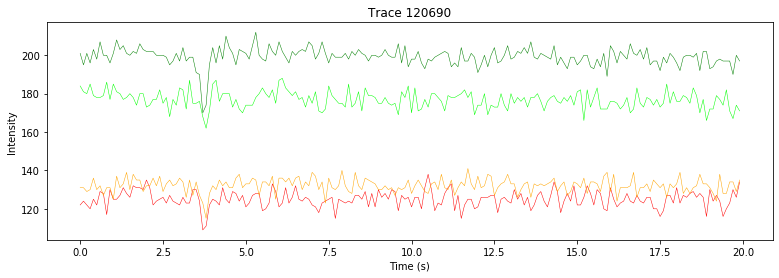

In [7]:
traces = raw_traces
plt.figure(figsize=(13, 4))
traceID = np.random.randint(0, n_traces)
utils.plot_one_trace(raw_traces, traceID, time_axis, range(0, 200), colors)

# Exercise

In [ ]:
def display_10_traces_with_initial_Cy3_intensity_above(x):
    """
    Plot 10 random traces that start with Cy3 (dark green) intensity above x
    
    input:
    x - float, between 0 and 256
    
    output:
    plot 10 trace profiles for traces that satisfy the requirement
    """

In [9]:
raw_traces.shape

(163482, 4, 200)

In [10]:
raw_traces[traceID, 0, :]

array([201, 195, 201, 196, 203, 198, 207, 200, 200, 196, 201, 208, 203,
       205, 201, 200, 202, 201, 206, 203, 202, 202, 202, 200, 200, 200,
       199, 195, 197, 201, 197, 204, 197, 199, 199, 191, 190, 170, 174,
       195, 204, 196, 205, 198, 210, 204, 201, 195, 203, 202, 201, 198,
       205, 212, 200, 198, 197, 206, 202, 200, 207, 202, 199, 196, 202,
       200, 202, 203, 202, 207, 205, 198, 201, 207, 201, 196, 201, 199,
       199, 199, 201, 198, 202, 200, 203, 201, 200, 197, 200, 200, 199,
       200, 203, 200, 199, 199, 206, 196, 205, 194, 198, 198, 202, 196,
       193, 198, 197, 199, 200, 201, 202, 201, 194, 196, 194, 204, 197,
       197, 201, 199, 191, 195, 200, 194, 200, 204, 196, 197, 200, 205,
       198, 199, 202, 201, 204, 201, 207, 199, 198, 201, 200, 199, 198,
       205, 195, 199, 196, 193, 199, 199, 195, 197, 200, 200, 194, 193,
       198, 194, 201, 189, 205, 202, 196, 202, 200, 198, 206, 201, 200,
       203, 198, 204, 195, 197, 197, 192, 199, 196, 201, 199, 19